In [1]:
import numpy as np
import matplotlib.pyplot as plt

from saccade_goal import * 

### Visualize Masks

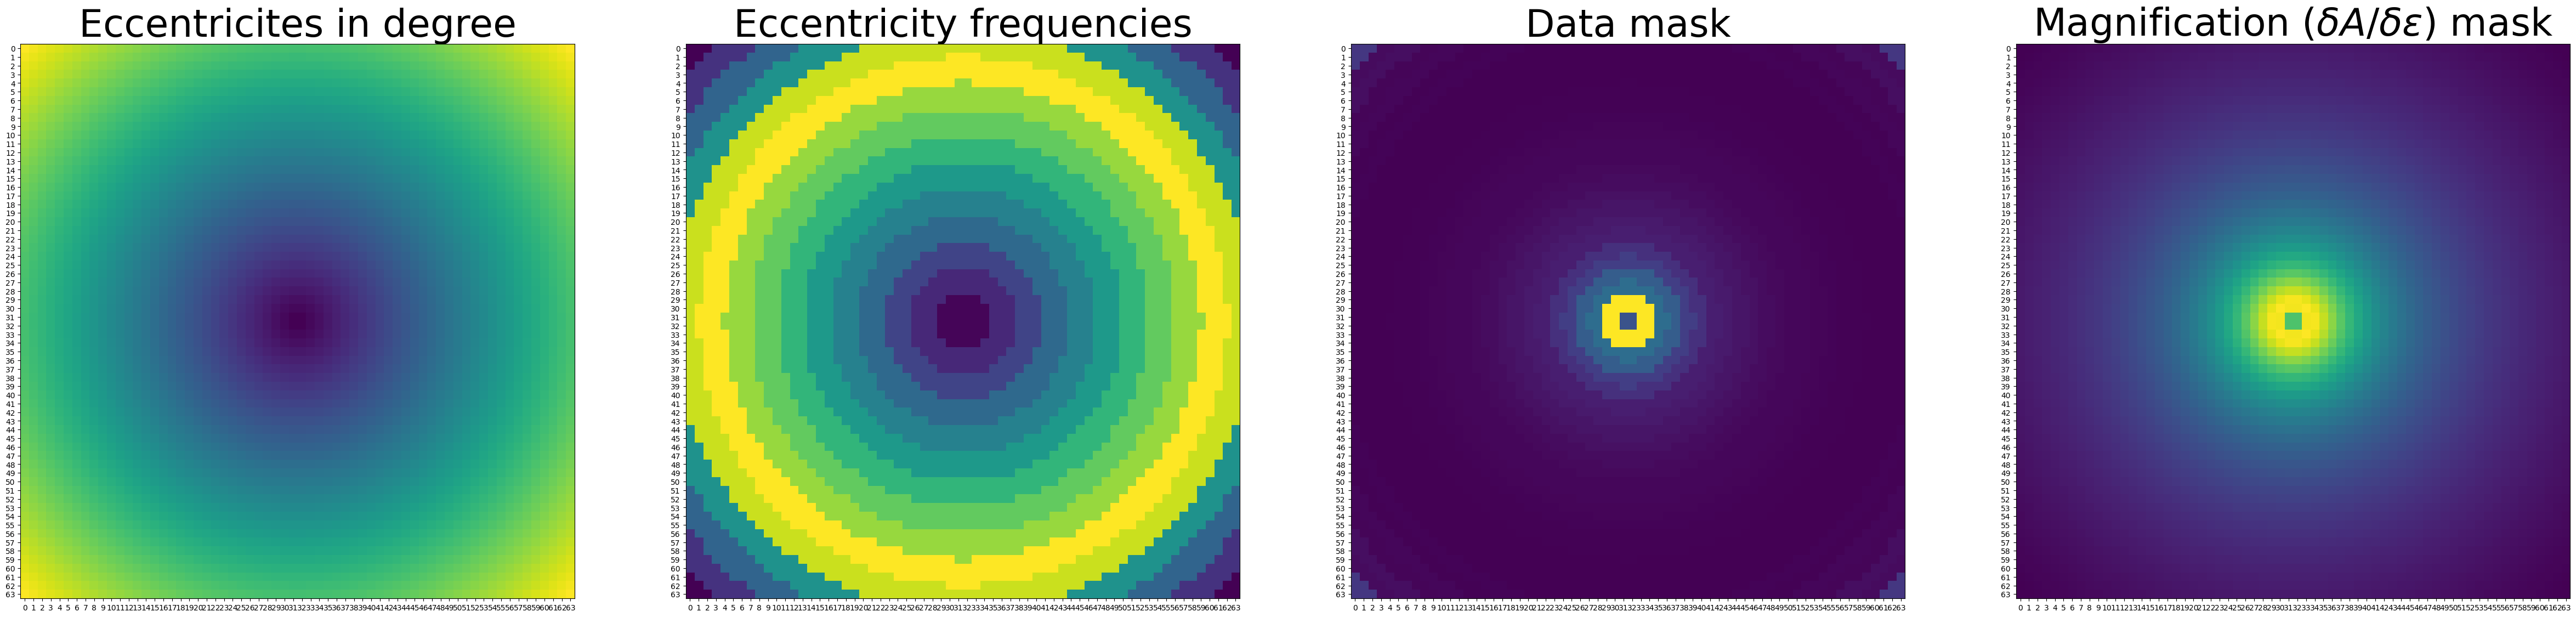

In [8]:
a = Saccade_goal(64)


f,ax= plt.subplots(1,4, figsize=(60,15))
fontsize=50

ax[0].imshow(a.eccentricity_map)
#ax[0].grid()
ax[0].set_xticks(np.arange(a.WIDTH))
ax[0].set_yticks(np.arange(a.WIDTH))
ax[0].set_title('Eccentricites in degree', fontsize=fontsize)

im = ax[1].imshow(a.eccentricity_frequency_map)
ax[1].set_xticks(np.arange(a.WIDTH))
ax[1].set_yticks(np.arange(a.WIDTH))
#ax[1].grid()
ax[1].set_title('Eccentricity frequencies', fontsize=fontsize)

im = ax[2].imshow(a.data_mask)
ax[2].set_xticks(np.arange(a.WIDTH))
ax[2].set_yticks(np.arange(a.WIDTH))
#ax[2].grid()
ax[2].set_title('Data mask', fontsize=fontsize)

im = ax[3].imshow(a.magnification_mask)
ax[3].set_xticks(np.arange(a.WIDTH))
ax[3].set_yticks(np.arange(a.WIDTH))
#ax[3].grid()
ax[3].set_title('Magnification ($\delta A / \delta \epsilon$) mask', fontsize=fontsize)



text = False
if text:
    for (j,i),label in np.ndenumerate(a.eccentricity_map):
         ax[0].text(i,j,np.round(label,2),ha='center',va='center', color='white')
    for (j,i),label in np.ndenumerate(a.eccentricity_frequency_map):
        ax[1].text(i,j,label,ha='center',va='center', color='white')
    for (j,i),label in np.ndenumerate(a.data_mask):
        ax[2].text(i,j,int(label*100),ha='center',va='center', color='white')

Text(0.5, 1.0, 'Mask * Random Sal_Map')

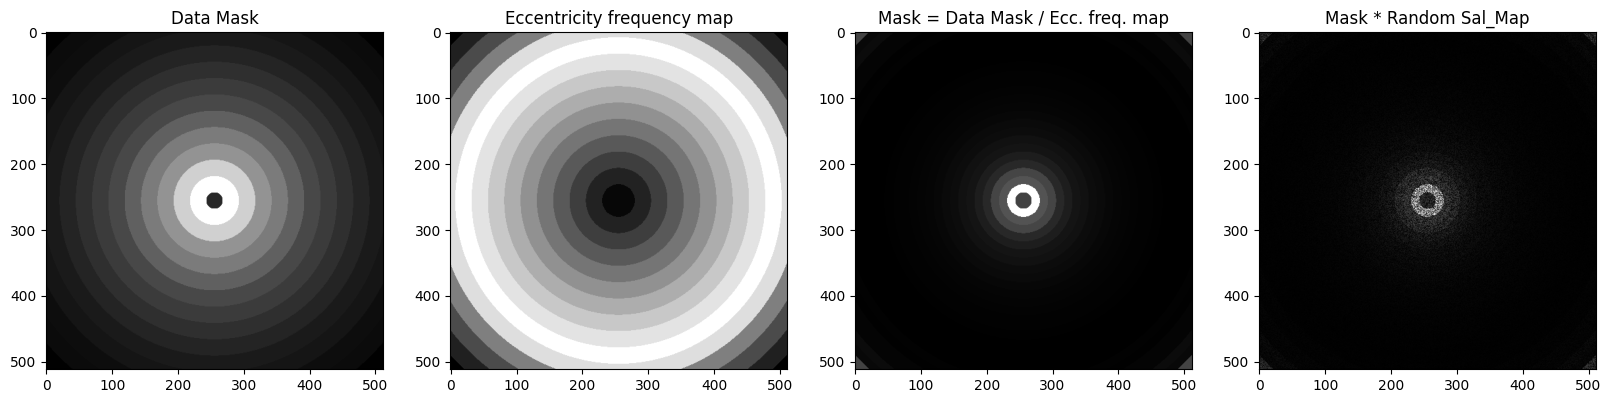

In [7]:
width=512
a = Saccade_goal(_WIDTH=width)
sal_map=random_dots(width)

f,ax= plt.subplots(1,4, figsize=(20,5))

ax[0].imshow(a.data_mask, cmap='gray')
ax[0].set_title('Data Mask')
ax[1].imshow(a.eccentricity_frequency_map, cmap='gray')
ax[1].set_title('Eccentricity frequency map')
ax[2].imshow(a.mask, cmap='gray')
ax[2].set_title('Mask = Data Mask / Ecc. freq. map')
ax[3].imshow(a.mask*sal_map, cmap='gray')
ax[3].set_title('Mask * Random Sal_Map')


### Infant data

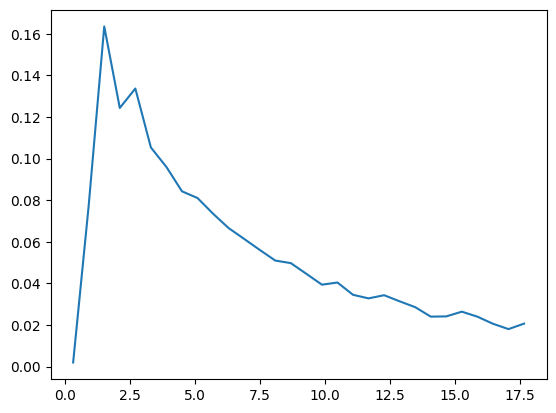

In [4]:
xdata, (mean_ch, error_ch), (mean_pa, error_pa), (mean_schütt, error_schütt) = load_data(hist_range=(0,12*np.sqrt(2)+1), n_bins=30)

plt.plot(xdata, mean_ch)

### Test pixelization effect

In [6]:
from tqdm import tqdm

eccs = []
N=5000
widths = [32,64,128,256, 512]

for width in widths:
    print(">>> ", width)
    a = Saccade_goal(_WIDTH=width, _fov=24)
    tmp = []
    for n in tqdm(range(N)):
        sal_map=random_dots(width)
        tmp.append(a.saccade_goal(sal_map=sal_map, mode='eccentricity'))
    eccs.append(tmp)


>>>  32


100%|██████████| 5000/5000 [00:05<00:00, 978.65it/s] 


>>>  64


100%|██████████| 5000/5000 [00:03<00:00, 1472.92it/s]


>>>  128


100%|██████████| 5000/5000 [00:15<00:00, 320.67it/s]


>>>  256


100%|██████████| 5000/5000 [00:44<00:00, 112.18it/s]


>>>  512


100%|██████████| 5000/5000 [01:33<00:00, 53.64it/s]


Text(0, 0.5, 'Prob. density')

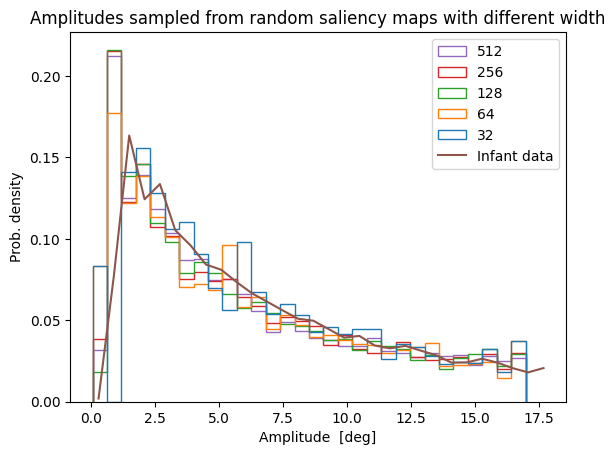

In [7]:
_ = plt.hist(eccs, bins=30, density=True, histtype='step', label=widths)
plt.plot(xdata, mean_ch, label='Infant data')
plt.legend()
plt.title('Amplitudes sampled from random saliency maps with different width')
plt.xlabel('Amplitude  [deg]')
plt.ylabel('Prob. density')